In [259]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and observe

In this notebook, I try to have a deeper dive into the Titanic dataset, to observe more detailed relationships between each of the variables and propose some hypothese and insights along the way.

In [260]:
path = '/Users/sjx/Desktop/archive/CS5785/ass1/titanic/train.csv'
df_train = pd.read_csv(path, index_col='PassengerId')
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<br> Some possible cleaning from the observation:
<br>Survivde, Pclass, Sex, Embarked -> categorical, turn into one hot encoding with dummy vairables (well, no need for this one, because the number is actually indicating a value, eg. Class 1 is "better" than Class 3. But if we use logistic regression, string variables need to be changed into numeric representations.)
<br>Name, Ticket -> drop (nope, maybe Name contrains some string... we'll explore the title later.)
<br>Age -> Age range, categorical would be more meaningful and easier to interpret, eg. 0-20 are youth, 20-40 are young adults, 40-60 are mid-aged people, 60-80 are elderly.
<br>
<br>Need more info:
<br>SibSp, Cabin, Parch -> we'll check their value_counts to see if there are illegal values, eg. floaitng point numbers.
<br>
<br>Fare is a continuous numerical variable.

In [261]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<br> Potential solution for missing values:
<br>Impute Age with median
<br>Impute Embarked with most frequent value
<br>mpute cabin with ?, maybe just drop cabin

In [262]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualize and distributions

In [263]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Survived ~ Pclass

Text(0.5,1,'Survival percentage according to class')

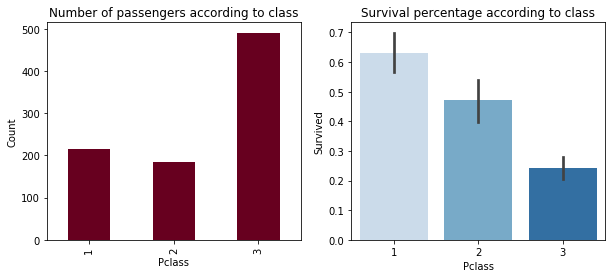

In [264]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
# ax1 = sns.distplot(df_train['Pclass'], ax=ax1)
ax1 = df_train['Pclass'].value_counts().sort_index().plot(kind='bar', cmap='RdBu', ax=ax1)
ax1.set_title('Number of passengers according to class')
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count')
ax2 = sns.barplot('Pclass', 'Survived', data=df_train, palette='Blues')
ax2.set_title('Survival percentage according to class')

Although class 3 has the most passengers, survival rate of class 3 is the lowest.

#### Survived ~ Pclass, Fare

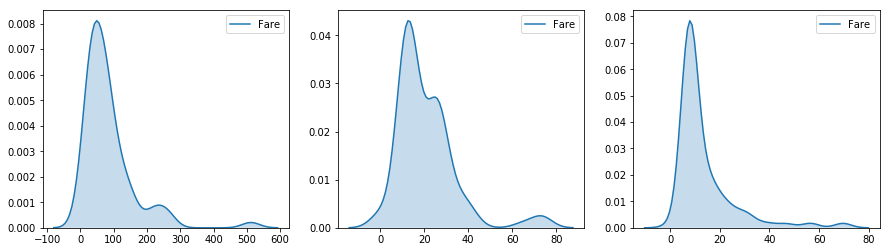

In [265]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))
ax1 = sns.kdeplot(df_train[df_train['Pclass'] == 1]['Fare'], shade=True, ax=ax1)
ax2 = sns.kdeplot(df_train[df_train['Pclass'] == 2]['Fare'], shade=True, ax=ax2)
ax3 = sns.kdeplot(df_train[df_train['Pclass'] == 3]['Fare'], shade=True, ax=ax3)

Fare and Pclass are highly correlated.

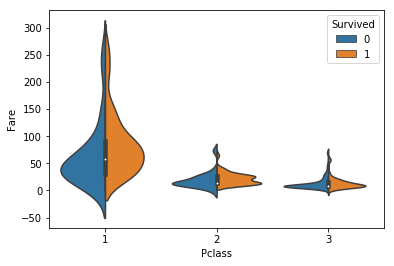

In [266]:
v = df_train[df_train['Pclass'] == 1]['Fare']
outliers = df_train[(df_train['Pclass'] == 1) & ((df_train['Fare'] - v.mean()).abs() > 3*v.std())].index
df_train.drop(outliers, inplace=True)
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df_train, split=True)

In each class, people paid higher fare have a higher chance to survive.

#### Survived ~ Sex

[Text(0,0,'male'), Text(0,0,'female')]

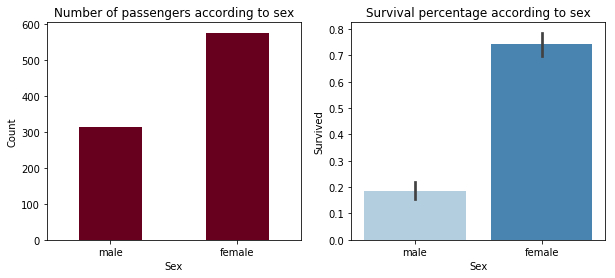

In [267]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
ax1 = df_train['Sex'].value_counts().sort_index().plot(kind='bar', cmap='RdBu', ax=ax1)
ax1.set_title('Number of passengers according to sex')
ax1.set_xlabel('Sex')
ax1.set_xticklabels(['male', 'female'], rotation=360)
ax1.set_ylabel('Count')
ax2 = sns.barplot('Sex', 'Survived', data=df_train, palette='Blues')
ax2.set_title('Survival percentage according to sex')
ax2.set_xticklabels(['male', 'female'])

Female survival rate is higher than male. Very humane for the males!

#### Survived ~ Age

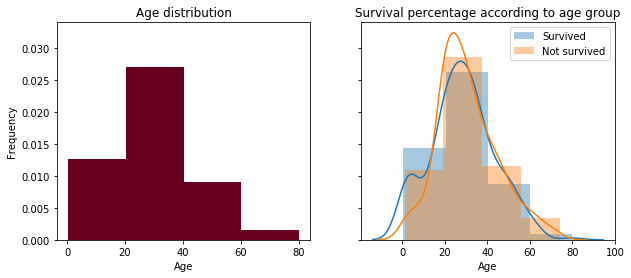

In [268]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4), sharey=True)
ax1 = df_train['Age'].plot(kind='hist', bins=4, density=True, cmap='RdBu', ax=ax1)
ax1.set_title('Age distribution')
ax1.set_xlabel('Age')
ax2 = sns.distplot(df_train[df_train['Survived'] == 1]['Age'].dropna(), bins=4, label='Survived', ax=ax2)
ax2 = sns.distplot(df_train[df_train['Survived'] == 0]['Age'].dropna(), bins=4, label='Not survived', ax=ax2)
ax2.set_title('Survival percentage according to age group')
ax2.legend()

There are much more young people on this trip. 0-20 survived more, 20-40 survived less.

#### Survived ~ Sex, Age

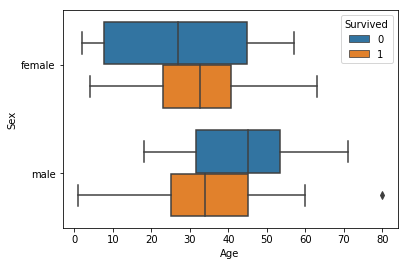

In [269]:
sns.boxplot(x='Age', y='Sex', data=df_train.dropna(), hue='Survived')

Young boys have a higher survival rate than adult man, but young girls survive less than adult women. Most of those survived age from 20-40.

#### Survived ~ Embarked

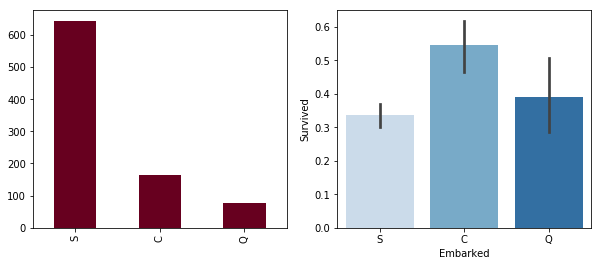

In [270]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))
ax1 = df_train['Embarked'].value_counts().plot(kind='bar', cmap='RdBu', ax=ax1)
ax2 = sns.barplot('Embarked', 'Survived', data=df_train, palette='Blues')

Although S has the most people embarked, the survival rate of those who embarked at C is much higher. Are the ports related to Pclass, eg. Class 1 embarked from port C?

#### Survived ~ Pclass, Embarked

Text(0.5,1,'Pclass~Embarked for survivor')

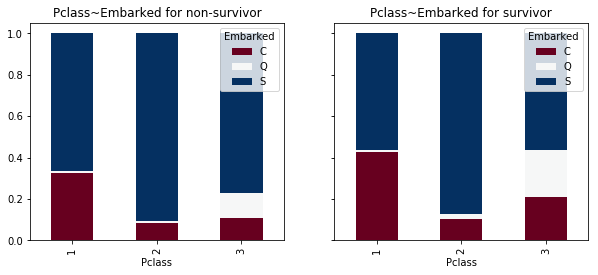

In [271]:
tmp0 = df_train[df_train['Survived'] == 0].groupby(['Pclass', 'Embarked']).size().unstack()
tmp1 = df_train[df_train['Survived'] == 1].groupby(['Pclass', 'Embarked']).size().unstack()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharey=True)
tmp0.div(tmp0.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, cmap='RdBu', ax=ax1)
tmp1.div(tmp1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, cmap='RdBu', ax=ax2)
ax1.set_title('Pclass~Embarked for non-survivor')
ax2.set_title('Pclass~Embarked for survivor')

The hypothesis is confirmed, Class 1 passengers do embark from C more than the other 2 classes. But actually there's not much difference between the embarkment of survivors and non-survivors. A little bit more non-survivors embarked from S. So it doesn't mean if you embark from C you'll have a higher chance to survive, it's actually about the Pclass.

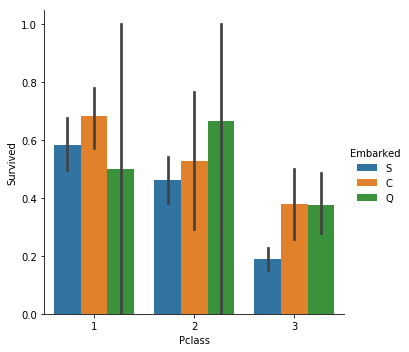

In [272]:
sns.catplot(x='Pclass', y='Survived', hue='Embarked', data=df_train, kind='bar')

#### Survived ~ SibSp, Sarch, family

The variable 'family' is added as the sum of number of SibSp and Parch, referring to the family size.

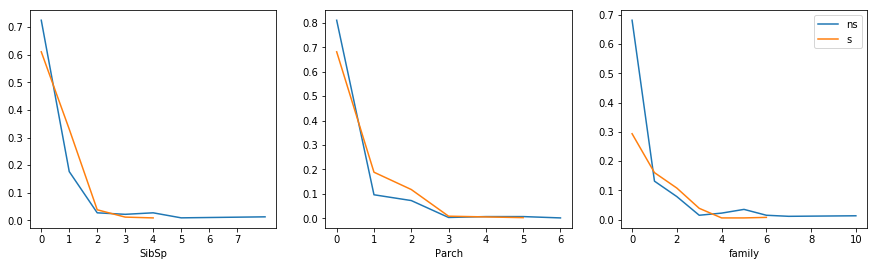

In [273]:
df_train['family'] = df_train['SibSp'] + df_train['Parch']
ns = df_train[df_train['Survived'] == 0]
s = df_train[df_train['Survived'] == 1]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))
ax1 = (ns.groupby('SibSp').size()/ns.shape[0]).plot(ax=ax1, label='ns')
ax1 = (s.groupby('SibSp').size()/s.shape[0]).plot(ax=ax1, label='s')
ax1.set_xticks(np.arange(8))
ax2 = (ns.groupby('Parch').size()/ns.shape[0]).plot(ax=ax2, label='ns')
ax2 = (s.groupby('Parch').size()/s.shape[0]).plot(ax=ax2, label='s')
ax3 = (ns.groupby('family').size()/ns.shape[0]).plot(ax=ax3, label='ns')
ax3 = (s.groupby('family').size()/ns.shape[0]).plot(ax=ax3, label='s')
plt.legend()

In [274]:
df_train.groupby('Survived')[['family', 'SibSp', 'Parch']].mean()

,family,SibSp,Parch
Survived,,,
0,0.883424,0.553734,0.329690
1,0.943953,0.477876,0.466077


Not much difference from the stats, graph not very interpretable. It looks like passengers with some family members traveling together have a higher odds of surviving, but the trend is not very clear. We'll exlpore more.

In [275]:
df_train.groupby(['SibSp', 'Survived']).size().unstack().fillna(0)

Survived,0,1
SibSp,,
0,398.0,207.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,0.0
8,7.0,0.0


Text(0.5,1,'Survival rate for different family size')

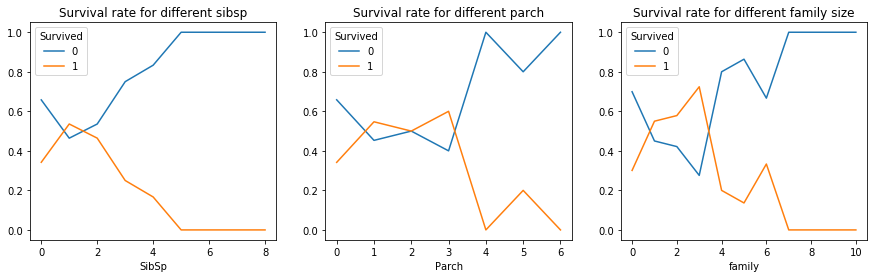

In [276]:
tmp1 = df_train.groupby(['SibSp', 'Survived']).size().unstack().fillna(0)
tmp2 = df_train.groupby(['Parch', 'Survived']).size().unstack().fillna(0)
tmp3 = df_train.groupby(['family', 'Survived']).size().unstack().fillna(0)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,4))
# ax1 = tmp1.div(tmp1.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax1)
ax1 = tmp1.div(tmp1.sum(1).astype(float), axis=0).plot(ax=ax1)
ax1.set_title('Survival rate for different sibsp')
# ax2 = tmp2.div(tmp2.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax2)
ax2 = tmp2.div(tmp2.sum(1).astype(float), axis=0).plot(ax=ax2)
ax2.set_title('Survival rate for different parch')
# ax3 = tmp3.div(tmp3.sum(1).astype(float), axis=0).plot.bar(stacked=True, ax=ax3)
ax3 = tmp3.div(tmp3.sum(1).astype(float), axis=0).plot(ax=ax3)
ax3.set_title('Survival rate for different family size')
# sns.catplot(x='SibSp', y='Survived', data=df_train, kind='bar')

Less SibSp, higher survival rate. Maybe an older brother has to help his younger brother or mother to get on the boat first, but that's just my guess. Overall, family size of 1-4 has more survivals than non-survivals, as shown in the graph where orange line is higher than blue line.

#### Survived ~ Title

As observed from the Name variable, it contains titles like 'Mr.' or 'Miss', etc. I wonder if this is a representation of a social status, thus maybe a person with such title would have some previlege or higher chance to survive. So I extract those strings and add a variable 'title'.

In [277]:
df_train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2


In [278]:
df_train['Name'].str.split(', ').apply(lambda x: x[1]).str.split('.').apply(lambda x: x[0]).value_counts()

Mr              515
Miss            181
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
the Countess      1
Sir               1
Mme               1
Lady              1
Capt              1
Jonkheer          1
Ms                1
Name: Name, dtype: int64

Too complicated! No time to bother with a Jonkheer.

In [279]:
df_train['title'] = df_train['Name'].str.split(', ').apply(lambda x: x[1]).str.split('.').apply(lambda x: x[0])
# df_train['title'].apply(lambda x: 'titles' if x in ['Master', 'Major', 'Capt', 'Col', 'Don', 'Sir', 'Jonkheer', 'Dr'])

title_map = {
        'Mr':'Mr',
        'Miss':'Miss',
        'Mrs':'Mrs',
        'Master':'titled',
        'Dr':'titled',
        'Rev':'titled',
        'Major':'titled',
        'Mlle':'Miss',
        'Col':'titled',
        'Don':'titled',
        'the Countess':'titled',
        'Sir':'titled',
        'Mme':'Mrs',
        'Lady':'Mrs',
        'Capt':'titled',
        'Jonkheer':'titled',
        'Ms':'Miss'
}
df_train['title'] = df_train['title'].map(title_map)
df_train['title'].value_counts()

Mr        515
Miss      184
Mrs       127
titled     62
Name: title, dtype: int64

Survived    0    1
title             
Miss       55  129
Mr        436   79
Mrs        26  101
titled     32   30 title
Miss      184
Mr        515
Mrs       127
titled     62
dtype: int64


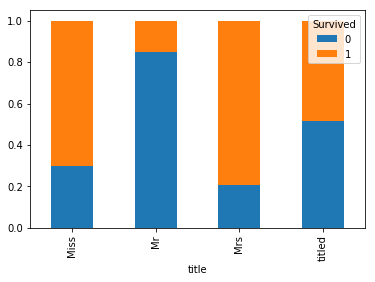

In [280]:
tmp = df_train.groupby(['title', 'Survived']).size().unstack()
print(tmp, tmp.sum(axis=1))
tmp.div(tmp.sum(1).astype(float), axis=0).plot.bar(stacked=True)

It turns out nearly everyone has such a title. I guess it is not related to social status. But anyway, females survive more than males, a lot of 'Mr.'s have lost their lives.

#### Survived ~ Title, Pclass

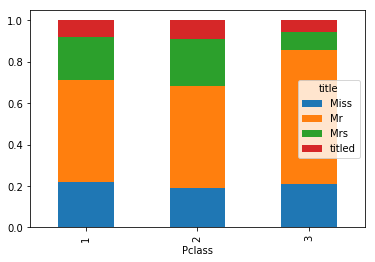

In [281]:
tmp = df_train.groupby(['Pclass', 'title']).size().unstack()
tmp.div(tmp.sum(1).astype(float), axis=0).plot.bar(stacked=True)

There are more males in Class 3, aligning well with the fact that more people from Class 3 didn't make it.

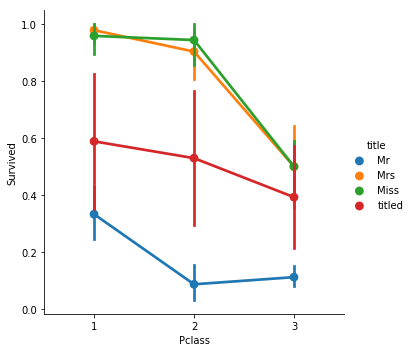

In [282]:
sns.catplot(x='Pclass', y='Survived', hue='title', data=df_train, kind='point')

Look! Nearly all females from Class 1 and 2 survive. Females survive more in each class, also follows the fact that passengers from higher classes survive more.

### Clean and format

In [283]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'family', 'title'],
      dtype='object')

In [284]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Cabin', 'SibSp', 'Parch', 'family', 'title']
for col in cat_cols:
    print('\n', col)
    print(df_train[col].value_counts())


 Survived
0    549
1    339
Name: Survived, dtype: int64

 Pclass
3    491
1    213
2    184
Name: Pclass, dtype: int64

 Sex
male      575
female    313
Name: Sex, dtype: int64

 Embarked
S    644
C    165
Q     77
Name: Embarked, dtype: int64

 Cabin
G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
E101           3
F33            3
F2             3
D              3
D36            2
D20            2
C78            2
C65            2
C52            2
B77            2
C68            2
E8             2
D35            2
C125           2
B20            2
B28            2
F4             2
E25            2
C2             2
E67            2
D17            2
C124           2
C126           2
B18            2
E44            2
E121           2
              ..
B19            1
B80            1
C90            1
C50            1
C49            1
D50            1
B94            1
C91            1
D21            1
C103           1
E77            1
C104           1
D19            

<br>Drop the random and uninterpretable string variables.
<br>Cut Age into bins, turn it into a categorical variable.
<br>Change string categorical variables into a numerical one-hot representation.

In [285]:
df_train.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [286]:
df_train['Age_bin'] = pd.cut(df_train['Age'], bins=4, right=True).cat.codes
# nan -> -1

In [287]:
sex_dict = {'male':0, 'female':1}
df_train['Sex'] = df_train['Sex'].map(sex_dict)

In [288]:
embarked_dict = {'S':0, 'C':1, 'Q':2}
df_train['Embarked'] = df_train['Embarked'].map(embarked_dict)

In [289]:
title_dict = {'Mr':0, 'Miss':1, 'Mrs':2, 'titled':3}
df_train['title'] = df_train['title'].map(title_dict)

In [290]:
df_train = pd.get_dummies(df_train, columns=['Embarked', 'title'])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family,Age_bin,Embarked_0.0,Embarked_1.0,Embarked_2.0,title_0,title_1,title_2,title_3
PassengerId,,,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1,1,1,0,0,1,0,0,0
2,1,1,1,38.0,1,0,71.2833,1,1,0,1,0,0,0,1,0
3,1,3,1,26.0,0,0,7.9250,0,1,1,0,0,0,1,0,0
4,1,1,1,35.0,1,0,53.1000,1,1,1,0,0,0,0,1,0
5,0,3,0,35.0,0,0,8.0500,0,1,1,0,0,1,0,0,0


### Split then impute

Note! I try to split the data into train and validate set first before imputation, because I don't want my potentially "illusional" guess about the data to bring non-existing relationships between the variables. However, there are nan values in the test set too, so I have to massage the test set a little bit too.

In [291]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'])
print(df_train.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# ok, still dataframe

(888, 16) (666, 15) (222, 15) (666,) (222,)


Fill nan value of Age with its median, and change the Age-bin correspondingly.

In [292]:
x_train['Age'].median()    # Age_bin = 1

28.0

In [293]:
x_train['Age'].fillna(28, inplace=True)
x_train.loc[x_train['Age_bin'] == -1, 'Age_bin'] = 1
print(x_train['Age'].isnull().sum())
print(x_train['Age_bin'].value_counts())

0
1    432
0    130
2     89
3     15
Name: Age_bin, dtype: int64


<span style="color:Red">Fail to impute Embarked, because dummified lol.</span> But there are only 2 nans in Embarked, shouldn't affect too much.

In [214]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 248 to 20
Data columns (total 15 columns):
Pclass          666 non-null int64
Sex             666 non-null int64
Age             666 non-null float64
SibSp           666 non-null int64
Parch           666 non-null int64
Fare            666 non-null float64
family          666 non-null int64
Age_bin         666 non-null int8
Embarked_0.0    666 non-null uint8
Embarked_1.0    666 non-null uint8
Embarked_2.0    666 non-null uint8
title_0         666 non-null uint8
title_1         666 non-null uint8
title_2         666 non-null uint8
title_3         666 non-null uint8
dtypes: float64(2), int64(5), int8(1), uint8(7)
memory usage: 46.8 KB


*666* *satanic metal intensifies*

### Predictive models

Final task: predict if a passenger survives from his/her boaring information. First have a general look at the correlation between each of the variables.

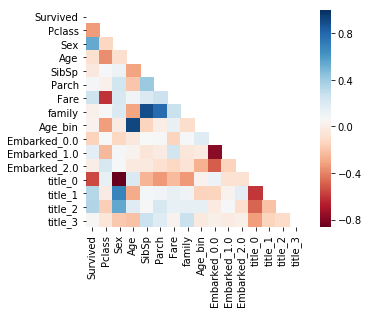

In [219]:
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, square=True, cmap='RdBu', mask=mask)

Survived ~ Pclass, Sex, title (which essentially infers sex, because title_0 is 'Mr.')

In [224]:
x_test['Age'].fillna(28, inplace=True)
x_test.loc[x_test['Age_bin'] == -1, 'Age_bin'] = 1
print(x_test['Age'].isnull().sum())
print(x_test['Age_bin'].value_counts())

0
1    141
0     44
2     35
3      2
Name: Age_bin, dtype: int64


Seems need to impute on both train and val (and test later) anyways... :(

#### Logistic regression

Pclass         -0.862595
title_0        -0.759233
SibSp          -0.291061
family         -0.178137
Age            -0.031169
Fare            0.003400
Age_bin         0.069989
Parch           0.112924
Embarked_0.0    0.214754
title_1         0.387784
Embarked_1.0    0.535495
Embarked_2.0    0.693376
title_3         0.965414
title_2         1.077935
Sex             1.605101
dtype: float64 0.7837837837837838


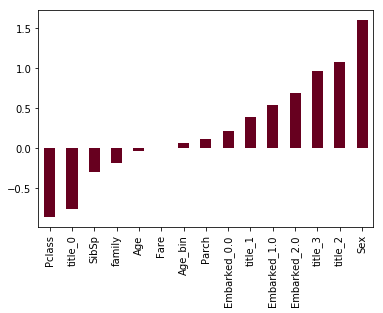

In [233]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(x_train.values, y_train.values)
logreg_score = logreg.score(x_test.values, y_test.values)
logreg_coef = pd.Series(logreg.coef_[0], index=x_train.columns).sort_values()
print(logreg_coef, logreg_score)
logreg_coef.plot.bar(cmap='RdBu')

#### Random forest

Embarked_2.0    0.007962
title_3         0.010417
Embarked_0.0    0.014383
Embarked_1.0    0.014704
Parch           0.021598
Age_bin         0.030362
SibSp           0.036841
title_2         0.038923
title_1         0.047113
family          0.047489
Pclass          0.071343
title_0         0.124229
Sex             0.128712
Age             0.180251
Fare            0.225672
dtype: float64 0.8108108108108109


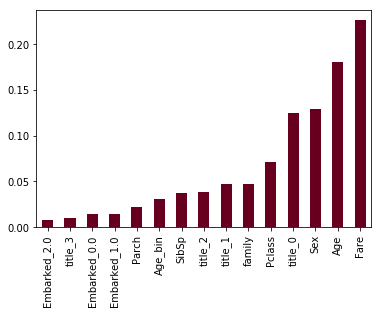

In [234]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=10).fit(x_train, y_train)
rf_score = rf.score(x_test, y_test)
rf_coef = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values()
print(rf_coef, rf_score)
rf_coef.plot.bar(cmap='RdBu')

#### KNeighbors

In [236]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(x_train, y_train)
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.7297297297297297


#### XGBoost

Embarked_1.0    0.000620
Embarked_2.0    0.002581
Age_bin         0.003929
title_1         0.004408
title_3         0.007994
title_2         0.016093
Embarked_0.0    0.016791
SibSp           0.025514
Parch           0.025712
Pclass          0.051873
title_0         0.054166
family          0.057197
Sex             0.082672
Age             0.251038
Fare            0.399412
dtype: float64 0.8153153153153153


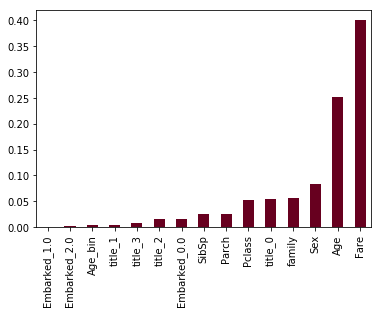

In [238]:
from sklearn.ensemble import GradientBoostingClassifier
xg = GradientBoostingClassifier().fit(x_train, y_train)
xg_score = xg.score(x_test, y_test)
xg_coef = pd.Series(xg.feature_importances_, index=x_train.columns).sort_values()
print(xg_coef, xg_score)
xg_coef.plot.bar(cmap='RdBu')

We can see that different models use the variables in a different way. In logistic regression, the most "important" variables are Pclass, title/Sex, Embarked, while in tree-based models, Fare and Age become quite important.

### Final prediction

Same imputation for test data.

In [251]:
test_path = '/Users/sjx/Desktop/archive/CS5785/ass1/titanic/test.csv'
df_test = pd.read_csv(test_path, index_col='PassengerId')
df_test['Age'].fillna(28, inplace=True)
df_test['Fare'].fillna(0, inplace=True)
df_test['Age_bin'] = pd.cut(df_test['Age'], bins=4, right=True).cat.codes
df_test.loc[df_test['Age_bin'] == -1, 'Age_bin'] = 1
df_test['Sex'] = df_test['Sex'].map(sex_dict)
df_test['family'] = df_test['SibSp'] + df_test['Parch']
df_test['Embarked'] = df_test['Embarked'].map(embarked_dict)
df_test['title'] = df_test['Name'].str.split(', ').apply(lambda x: x[1]).str.split('.').apply(lambda x: x[0])
df_test['title'] = df_test['title'].map(title_map)
df_test['title'] = df_test['title'].map(title_dict)
df_test = pd.get_dummies(df_test, columns=['Embarked', 'title'])
df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
print(df_test.shape)
df_test.head()

(418, 15)


,Pclass,Sex,Age,SibSp,Parch,Fare,Age_bin,family,Embarked_0,Embarked_1,Embarked_2,title_0.0,title_1.0,title_2.0,title_3.0
PassengerId,,,,,,,,,,,,,,,
892,3,0,34.5,0,0,7.8292,1,0,0,0,1,1,0,0,0
893,3,1,47.0,1,0,7.0000,2,1,1,0,0,0,0,1,0
894,2,0,62.0,0,0,9.6875,3,0,0,0,1,1,0,0,0
895,3,0,27.0,0,0,8.6625,1,0,1,0,0,1,0,0,0
896,3,1,22.0,1,1,12.2875,1,2,1,0,0,0,0,1,0


In [252]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 15 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Age_bin       418 non-null int8
family        418 non-null int64
Embarked_0    418 non-null uint8
Embarked_1    418 non-null uint8
Embarked_2    418 non-null uint8
title_0.0     418 non-null uint8
title_1.0     418 non-null uint8
title_2.0     418 non-null uint8
title_3.0     418 non-null uint8
dtypes: float64(2), int64(5), int8(1), uint8(7)
memory usage: 29.4 KB


In [254]:
preds = xg.predict(df_test)
out = pd.DataFrame({'PassengerId':df_test.index, 
                   'Survived':preds})
out.to_csv('practice_titanic_out.csv', index=False)
print('out to file.')

out to file.


### Takeaways
<span style="color:Red">
    <br> Should visualize before even cleaning (referring to categorical variables like Embarked)
    <br> Shouldn't have dropped Cabin so quickly, maybe it's related to the relative location in the ship, which might be crucial to survival!
    <br> It's hard to come up with meaningful variables and intuitive graphs!
    <br> Seems it needs to impute on both train and val (and test) data anyways... because classification models don't allow nan values. Maybe next time I'll follow the olde path to impute then split??
</span>
<br>
<br> About visualization:
<br> univariate, cat -> count/pie, univariate, continuous -> hist/kde
<br> two cat -> stacked bar graph (proportion)
<br> one cat, one continuous -> box/violin, continuous as y, cat as x, target as hue
<br>
<br> More to think about:
<br> When target is continuous

### That's a wrap! New exploration TBC...